In [8]:
import csv
import sys
import os
import pickle
import random
import numpy as np
import time
import operator
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

import statsmodels.stats.api as sms

import scipy.stats
from scipy.stats import entropy
from scipy.stats import spearmanr
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
sys.path.append('../python')
from permutation import permutation, compute_alignment_strength
from utils.utils_funcs import aggregate_embeddings_visual_and_language, get_variance, get_distinctness_from_nearest_5
from utils.utils_funcs import load_data_to_dict

In [10]:
# # aggregate both visual embeddings and language embeddings
# def aggregate_embeddings_visual_and_language(input_struct,n_sample_per_visual,n_sample_per_language):
# 	words=input_struct['words']
# 	embed_dict=dict()
# 	for word in words:
# 		n_sample_v = min(len(input_struct['embeds'][word]['visual']), n_sample_per_visual)
# 		visual_temp=np.mean(np.array(random.sample(input_struct['embeds'][word]['visual'],n_sample_v)),axis=0)
# 		n_sample_l = min(len(input_struct['embeds'][word]['language']), n_sample_per_language)
# 		language_temp=np.mean(np.array(random.sample(input_struct['embeds'][word]['language'],n_sample_l)),axis=0)
# 		#embed_dict[word]=dict(visual=np.expand_dims(visual_temp,axis=0),language=language_temp)
# 		embed_dict[word]=dict(visual=visual_temp,language=np.squeeze(language_temp))
# 	return dict(embeds=embed_dict,words=words)

In [11]:
def get_alignment_strength_list(struct,concepts):
    visual_embeddings_list=list()
    langauge_embeddings_list=list()
    for concept in concepts:
        embeddings=struct["embeds"][concept]
        visual_embeddings_list.append(embeddings["visual"])
        langauge_embeddings_list.append(embeddings["language"])
    z_0=np.array(visual_embeddings_list)
    z_1=np.array(langauge_embeddings_list)
    return permutation(z_0,z_1,n_sim=1000)

In [12]:
vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_concept_least20_swav_glove_20.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_concept_least20_swav_glove_20.pkl","rb"))

aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,1,1)
aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,1,1)

In [13]:
_,vg_noun_list=get_alignment_strength_list(aggregated_vg_noun_data,aggregated_vg_noun_data["words"])

In [14]:
_,vg_verb_list=get_alignment_strength_list(aggregated_vg_verb_data,aggregated_vg_verb_data["words"])

0.102509532168243


/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


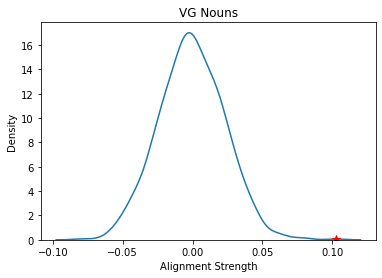

In [15]:
# fig, ax = plt.subplots()
ax=sns.distplot(vg_noun_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
yi = np.interp(vg_noun_list[0],data_x, data_y)
print(vg_noun_list[0])
plt.plot(vg_noun_list[0],yi, marker="*", markersize=8, color='r')
ax.set(xlabel='Alignment Strength',title='VG Nouns')
ax.vlines(vg_noun_list[0],0,yi,color='r')

0.0005844486044774454


/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


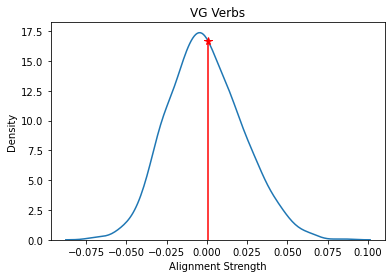

In [16]:
# fig, ax = plt.subplots()
ax=sns.distplot(vg_verb_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
yi = np.interp(vg_verb_list[0],data_x, data_y)
print(vg_verb_list[0])
plt.plot(vg_verb_list[0],yi, marker="*", markersize=8, color='r')
ax.set(xlabel='Alignment Strength',title='VG Verbs')
ax.vlines(vg_verb_list[0],0,yi,color='r')

0.102509532168243
0.0005844486044774454


/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


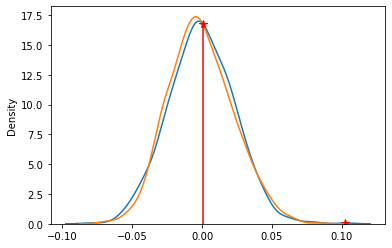

In [17]:
# fig, ax = plt.subplots()
ax=sns.distplot(vg_noun_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
yi = np.interp(vg_noun_list[0],data_x, data_y)
print(vg_noun_list[0])
plt.plot(vg_noun_list[0],yi, marker="*", markersize=8, color='r')
# ax.set(xlabel='Alignment Strength',title='VG Nouns')
ax.vlines(vg_noun_list[0],0,yi,color='r')

# fig, ax = plt.subplots()
ax=sns.distplot(vg_verb_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
yi = np.interp(vg_verb_list[0],data_x, data_y)
print(vg_verb_list[0])
plt.plot(vg_verb_list[0],yi, marker="*", markersize=8, color='r')
# ax.set(xlabel='Alignment Strength',title='VG Verbs')
ax.vlines(vg_verb_list[0],0,yi,color='r')

In [18]:
df1=pd.DataFrame(vg_noun_list,columns=['alignment'])
df1['type']='noun'
df2=pd.DataFrame(vg_verb_list,columns=['alignment'])
df2['type']='verb'
df=pd.concat([df1,df2])

In [19]:
df.shape

(2002, 2)

In [20]:
df_true=pd.DataFrame([vg_noun_list[0],vg_verb_list[0]],columns=['alignment_true'])
df_true['type']=['noun','verb']

In [21]:
df_true

,alignment_true,type
0,0.102510,noun
1,0.000584,verb


<AxesSubplot:xlabel='type', ylabel='alignment_true'>

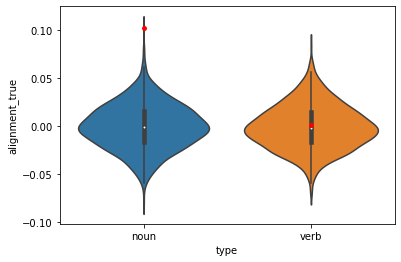

In [22]:
ax = sns.violinplot(x="type", y="alignment", data=df)
sns.swarmplot(y="alignment_true", x="type", data=df_true, color="red")

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


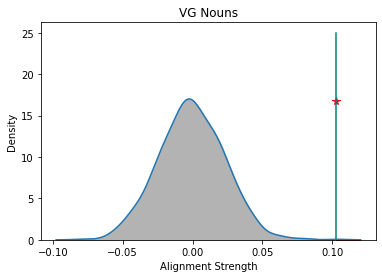

In [42]:
ax=sns.distplot(vg_noun_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
x_t = vg_noun_list[0]
y_i = np.interp(x_t ,data_x, data_y)
plt.plot(x_t ,yi , marker="*", markersize=8, color='r')
ax.set(xlabel='Alignment Strength',title='VG Nouns')
# ax.vlines(vg_noun_list[0],0,yi,color='r')
ax.plot((x_t, x_t), (0, 25), color='#008176')

plt.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
plt.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


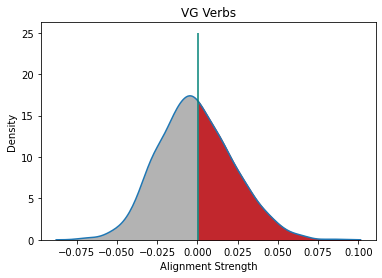

In [45]:
ax=sns.distplot(vg_verb_list,hist=False)
data_x, data_y = ax.lines[0].get_data()
x_t = vg_verb_list[0]
y_t = np.interp(x_t ,data_x, data_y)
ax.set(xlabel='Alignment Strength',title='VG Verbs')
ax.vlines(x_t,0,25,color='#008176')
# plt.plot(vg_verb_list[0],yi, marker="*", markersize=8, color='r')

plt.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
plt.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

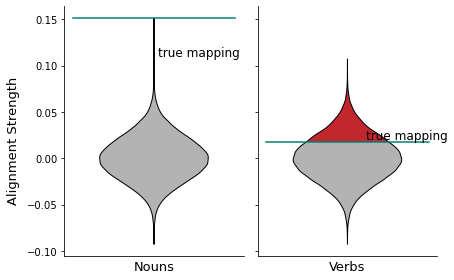

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np
import pandas as pd

vg_noun_list=np.array(vg_noun_list)
vg_verb_list=np.array(vg_verb_list)

rec_x=0.85
rec_y=1.15

#create figure and axes
fig, (ax1,ax2) =plt.subplots(1,2,sharey=True)

# sep is the point where the separation should occur
sep = vg_noun_list[0]
# plt.plot((sep, sep), (rec_x, rec_y), 'k-')
ax1.plot((rec_x, rec_y), (sep, sep), color='#008176')
# plot the violin
p = ax1.violinplot(np.array(vg_noun_list),vert=True,
                   bw_method='scott', widths=0.2,showextrema=False)
# obtain path of violin surrounding
path = p['bodies'][0].get_paths()[0]
#create two rectangles left and right of the separation line
r =  matplotlib.patches.Rectangle((rec_x,vg_noun_list.min()), 
                  width=rec_y-rec_x, height=sep-vg_noun_list.min(), facecolor="#b3b3b3")
r2 =  matplotlib.patches.Rectangle((rec_x,sep), 
                  width=rec_y-rec_x, height=vg_noun_list.max()-sep, facecolor="#c1272d")
# clip the rectangles with the violin path
r.set_clip_path(path, transform=ax1.transData)
r2.set_clip_path(path, transform=ax1.transData)
ax1.add_patch(r)
ax1.add_patch(r2)
# add edge around violin
s = matplotlib.patches.PathPatch(path, linewidth=1, edgecolor="k", fill=False)
ax1.add_patch(s)



# sep is the point where the separation should occur
sep = vg_verb_list[0]
# plt.plot((sep, sep), (rec_x, rec_y), 'k-')
ax2.plot((rec_x, rec_y), (sep, sep), color='#008176')
# plot the violin
p = ax2.violinplot(np.array(vg_verb_list),vert=True,
                   bw_method='scott', widths=0.2,showextrema=False)
# obtain path of violin surrounding
path = p['bodies'][0].get_paths()[0]
#create two rectangles left and right of the separation line
r =  matplotlib.patches.Rectangle((rec_x,vg_verb_list.min()), 
                  width=rec_y-rec_x, height=sep-vg_verb_list.min(), facecolor="#b3b3b3")
r2 =  matplotlib.patches.Rectangle((rec_x,sep), 
                  width=rec_y-rec_x, height=vg_verb_list.max()-sep, facecolor="#c1272d")
# clip the rectangles with the violin path
r.set_clip_path(path, transform=ax2.transData)
r2.set_clip_path(path, transform=ax2.transData)
ax2.add_patch(r)
ax2.add_patch(r2)
# add edge around violin
s = matplotlib.patches.PathPatch(path, linewidth=1, edgecolor="k", fill=False)
ax2.add_patch(s)

ax1.get_shared_y_axes().join(ax1, ax2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Nouns',fontsize=13)
ax1.axes.xaxis.set_ticks([])


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Verbs',fontsize=13)
ax2.axes.xaxis.set_ticks([])

# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.02, 0.5, 'Alignment Strength', va='center', rotation='vertical', fontsize=13)

fig.text(0.33, 0.79, 'true mapping', fontsize=12)
fig.text(0.81, 0.50, 'true mapping', fontsize=12)
plt.tight_layout()
plt.savefig("cc.png",dpi=1600, bbox_inches='tight')
plt.show()

------

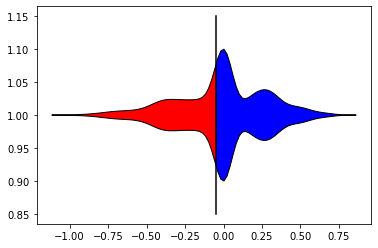

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np
import pandas as pd

#generate some data
a = np.log(1+np.random.poisson(size=1500))
b = 0.2+np.random.rand(1500)*0.3
c = 0.1+np.random.rand(1500)*0.6
results=pd.DataFrame({'Balance':np.r_[a*b,-a*c]})

#create figure and axes
fig, ax=plt.subplots()
# sep is the point where the separation should occur
sep = -0.05
plt.plot((sep, sep), (0.85, 1.15), 'k-')
# plot the violin
p = plt.violinplot(np.array(results['Balance']),vert=False,
                   bw_method='scott', widths=0.2,showextrema=False)
# obtain path of violin surrounding
path = p['bodies'][0].get_paths()[0]

#create two rectangles left and right of the separation line
r =  matplotlib.patches.Rectangle((results['Balance'].min(),0.85), 
                  width=sep-results['Balance'].min(), height=0.3, facecolor="r")
r2 =  matplotlib.patches.Rectangle((sep,0.85), 
                  width=results['Balance'].max()-sep, height=0.3, facecolor="b")
# clip the rectangles with the violin path
r.set_clip_path(path, transform=ax.transData)
r2.set_clip_path(path, transform=ax.transData)
ax.add_patch(r)
ax.add_patch(r2)

#optionally add edge around violin.
s = matplotlib.patches.PathPatch(path, linewidth=1, edgecolor="k", fill=False)
ax.add_patch(s)

plt.show()